# Projeto Semantix - EBAC - Profissão: Cientista de dados

Problemática escolhida: Prevenção a doença diabetes.

<br>
Utilização de dados médicos de pacientes com o objetivo da criação de um modelo de aprendizado de máquina que possa prever a chance de um novo paciente ter ou não diabetes no futuro.
<br>
A diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, que é um hormônio responsável por regular a glicose no sangue e garantir energia para o organismo, tem a função de quebrar as moléculas de glicose(açúcar) transformando-a em energia.    

Fonte de dados:

Dataset disponibilizado no site kaggle através do [link](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data)

Explicando colunas do dataset:
<br>

| Coluna                        | Descrição                                                     | Tipo     |
| :-----------------------------| :------------------------------------------------------------:| -------: |
| **Pregnancies**               | Número de vezes que a paciente ficou grávida                  | *int*    | 
| **Glucose**                   | Concentração de glicose plasmática                            | *int*    |
| **BloodPressure**             | Pressão arterial diastólica (mm Hg).                          | *int*    |
| **SkinThickness**             | Espessura da dobra cutânea tricipital (mm).                   | *int*    |
| **Insulin**                   | Insulina sérica de 2 horas (mu U/ml).                         | *int*    |
| **BMI**                       | Índice de massa corporal (peso em kg/(altura em m)^2).        | *float*  |
| **DiabetesPedigreeFunction**  | Probabilidade de diabetes com base no histórico familiar      | *float*  |
| **Age**                       | Idade do paciente (anos)                                      | *int*    |
| **Outcome**                   | Variável que indica se paciente possui (1) ou não (0) diabetes| *int*    |

In [32]:
# Importando bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Análise Exploratória de Dados

### Carregando a Base de dados

In [3]:
df = pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# Verificando o número de linhas e colunas
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

768 linhas e 9 colunas


In [54]:
# Verificando informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Verificando valores nulos

In [55]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Verificando linhas duplicadas

In [56]:
print(f'{df.duplicated().sum()} linhas duplicadas')

0 linhas duplicadas


### Verificando correlação

Ver a correlação entre as features e decidir se irei manter todas as features

<Axes: >

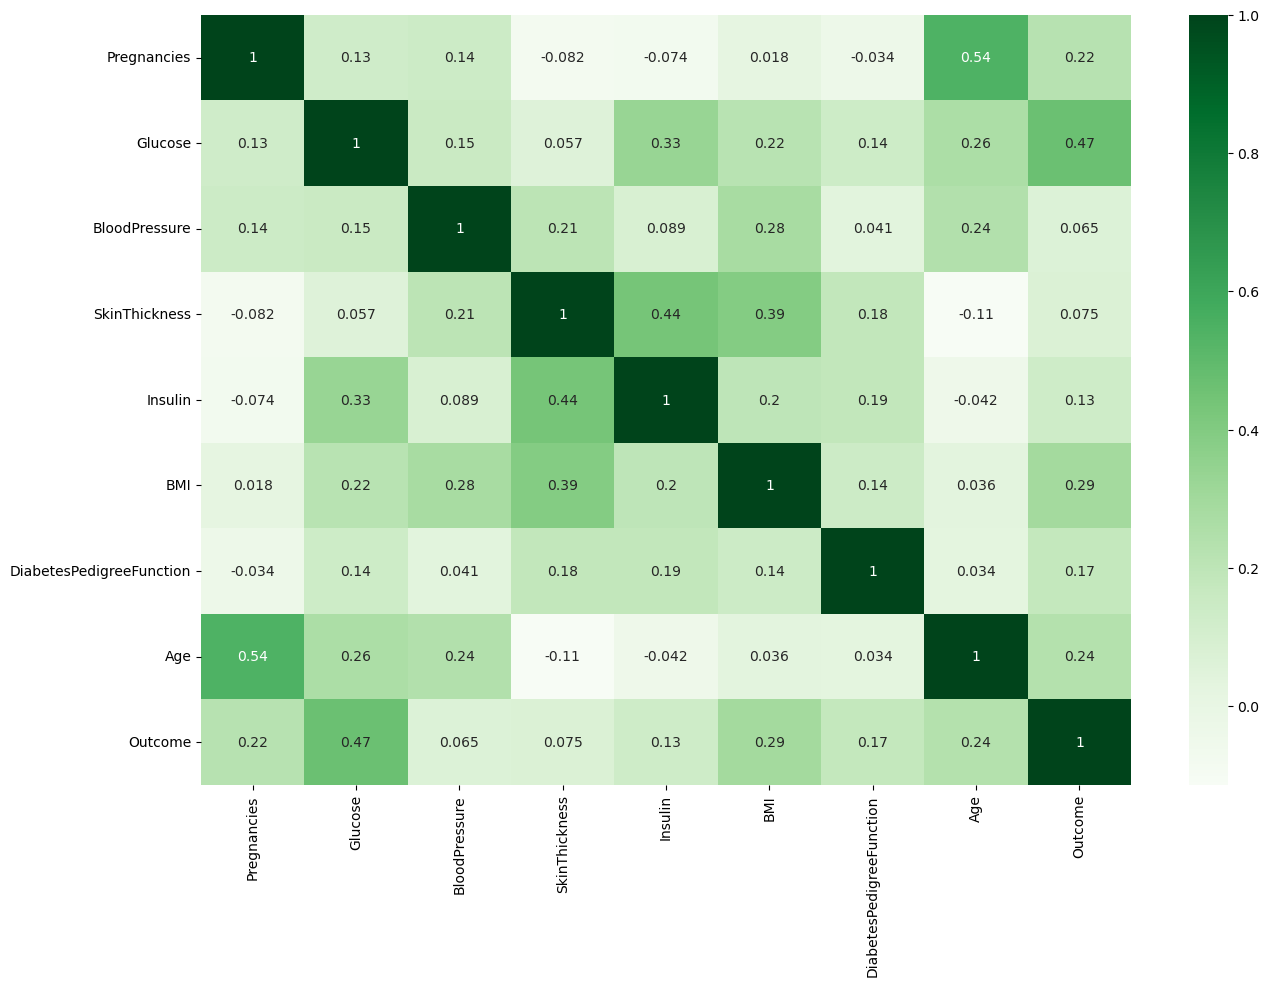

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

### Analisando variáveis do dataset

Irei criar funções para que seja feita a análise das variáveis gráficamente, com o objetivo de observar o comportamento dos dados e realizar alterações necessárias

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(20, 5))
    sns.displot(data=df, x=coluna, kde=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(16, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Variável "Outcome"

<Figure size 2000x500 with 0 Axes>

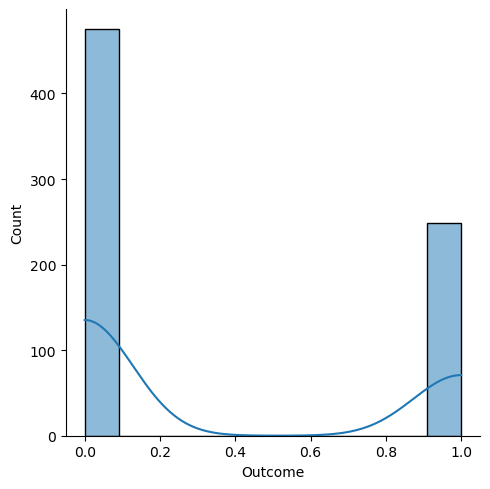

In [24]:
histograma(df['Outcome'])

### Variáveis explicativas

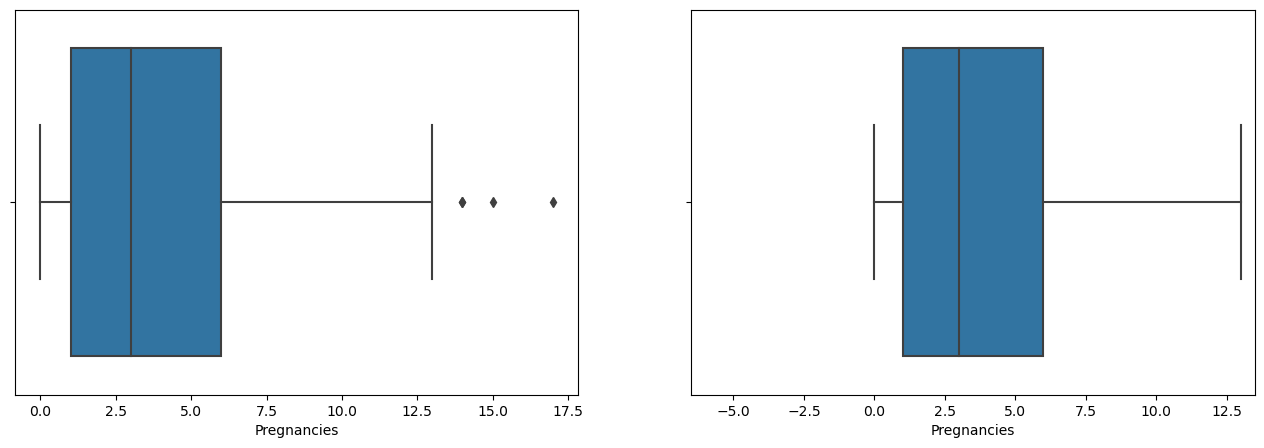

<Figure size 2000x500 with 0 Axes>

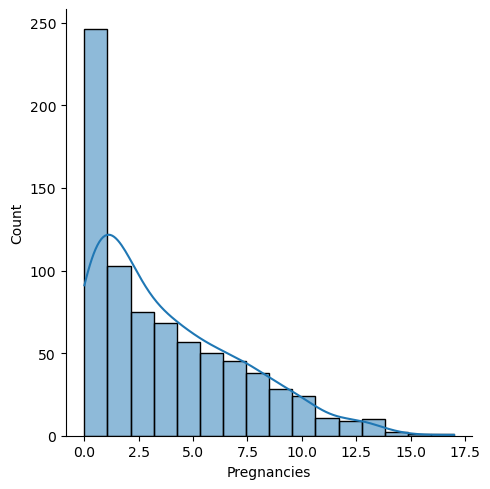

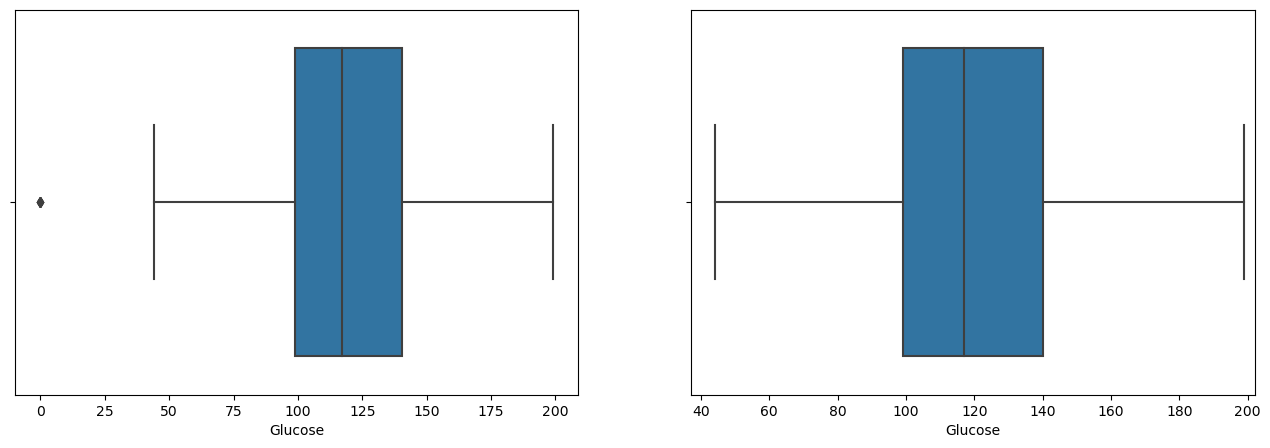

<Figure size 2000x500 with 0 Axes>

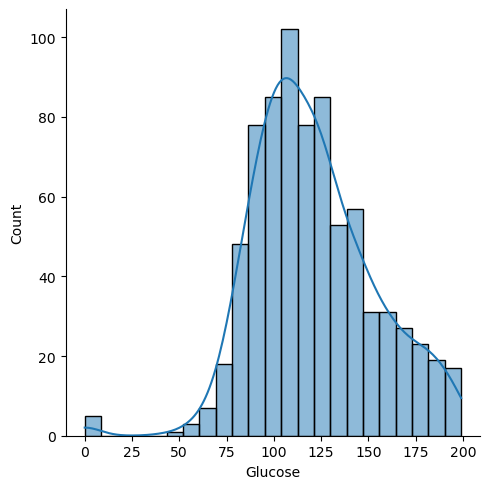

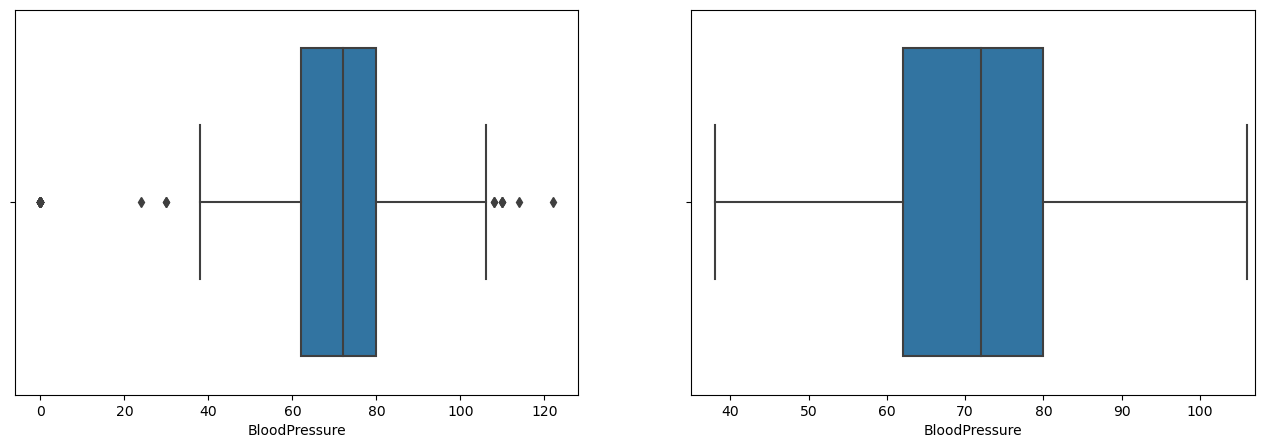

<Figure size 2000x500 with 0 Axes>

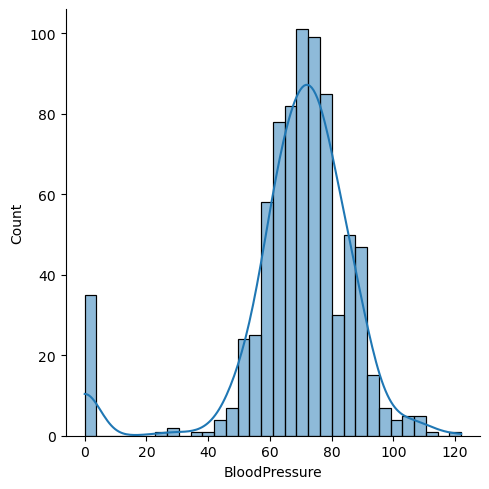

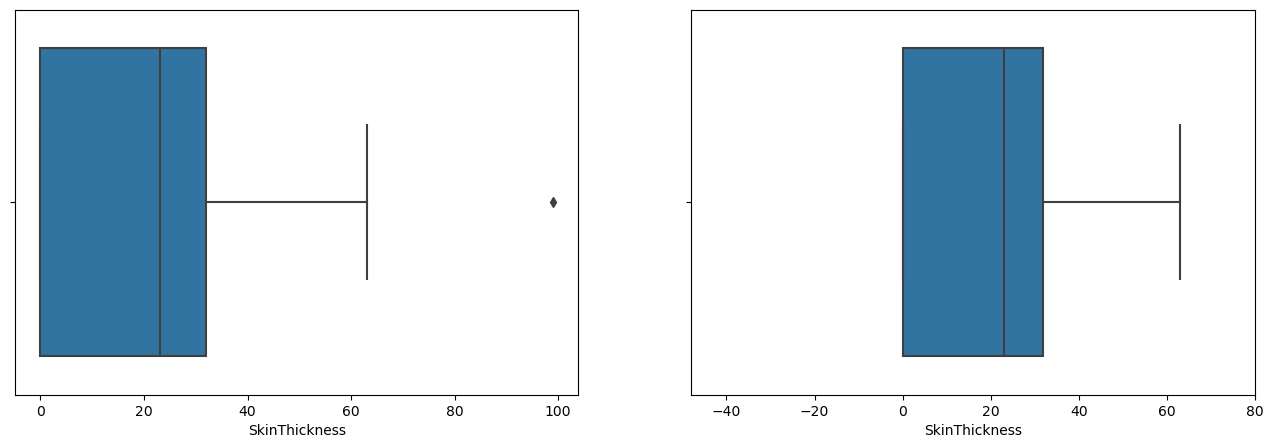

<Figure size 2000x500 with 0 Axes>

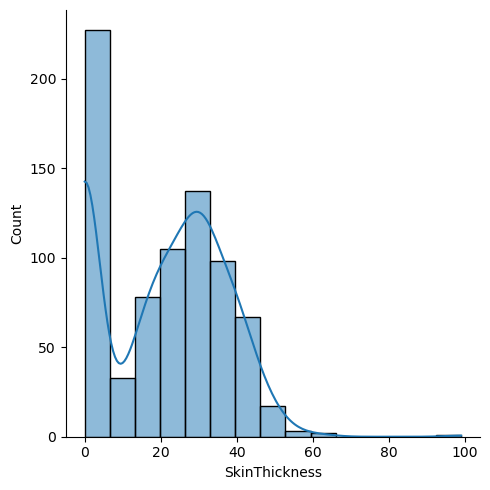

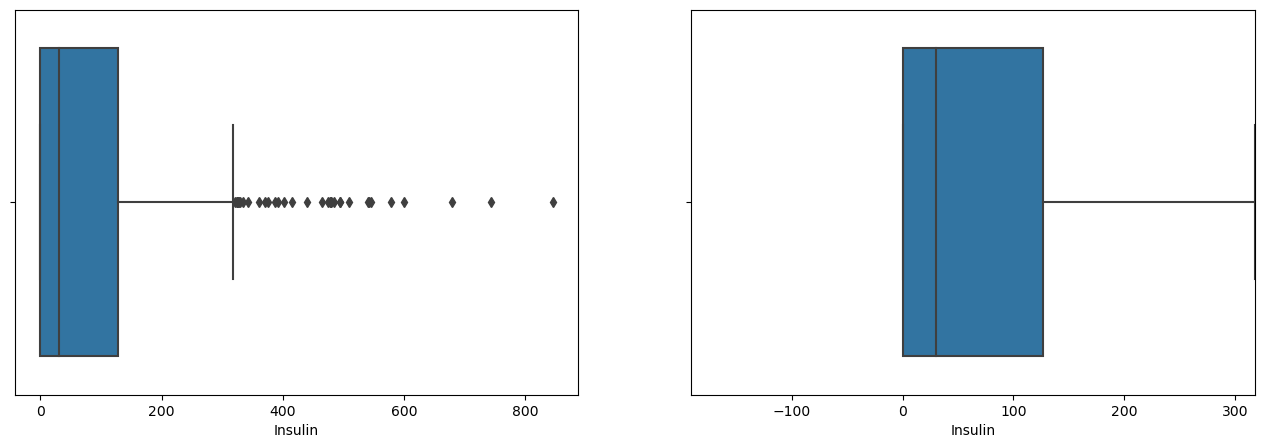

<Figure size 2000x500 with 0 Axes>

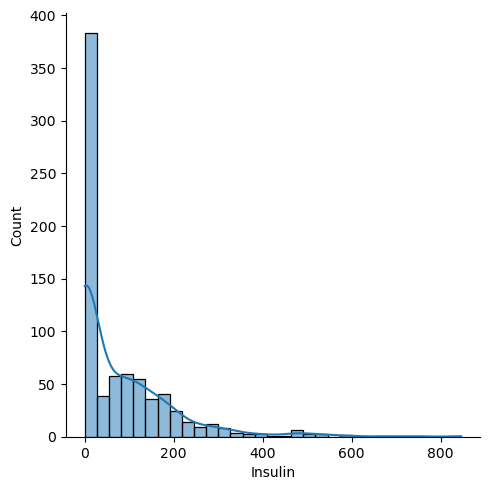

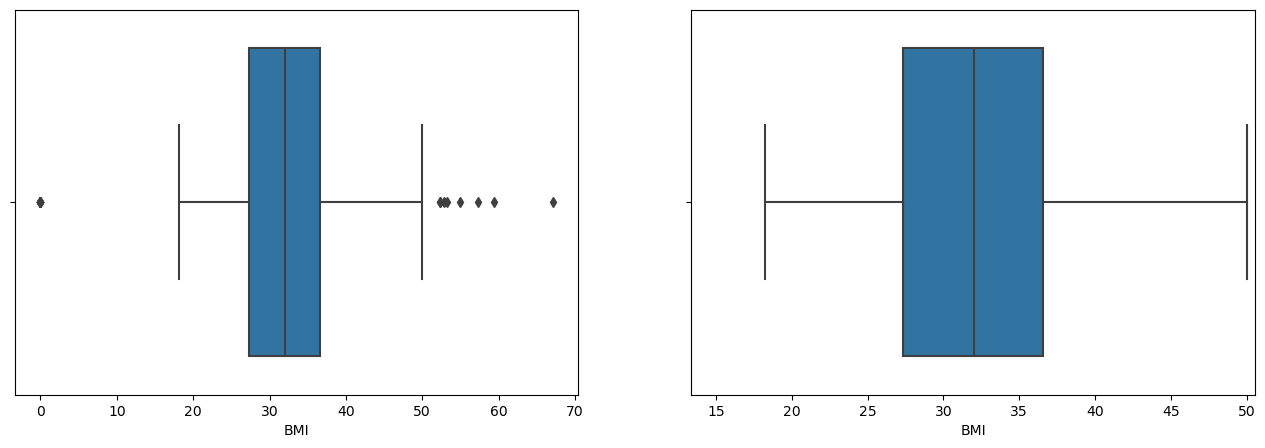

<Figure size 2000x500 with 0 Axes>

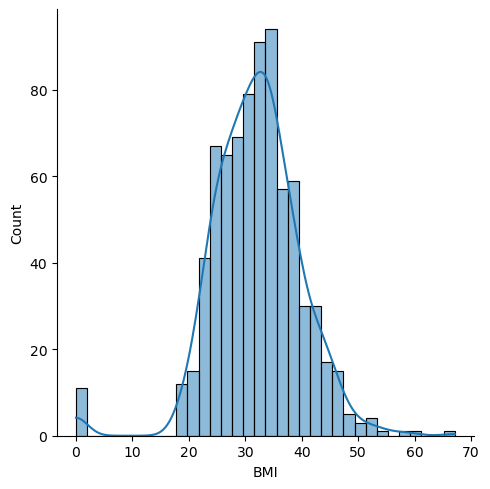

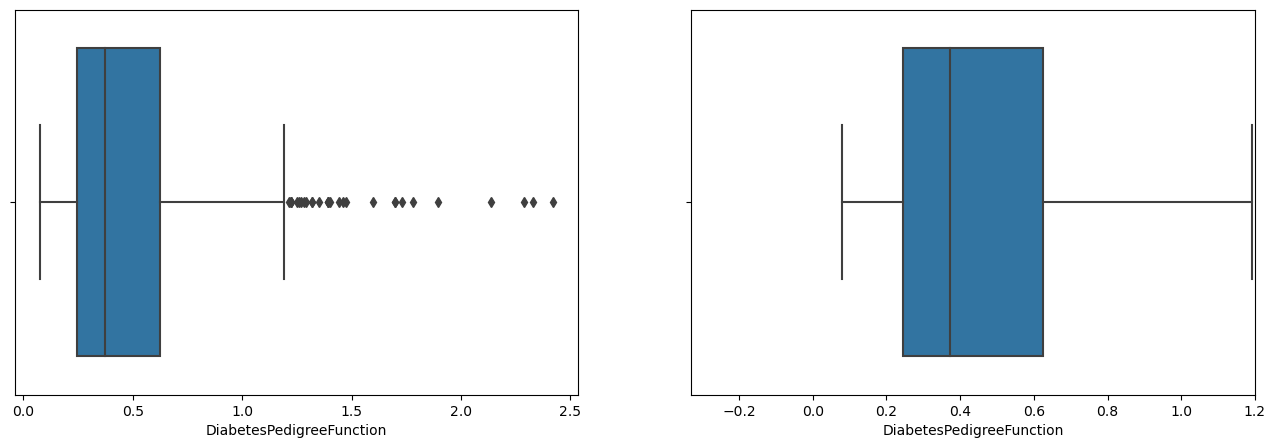

<Figure size 2000x500 with 0 Axes>

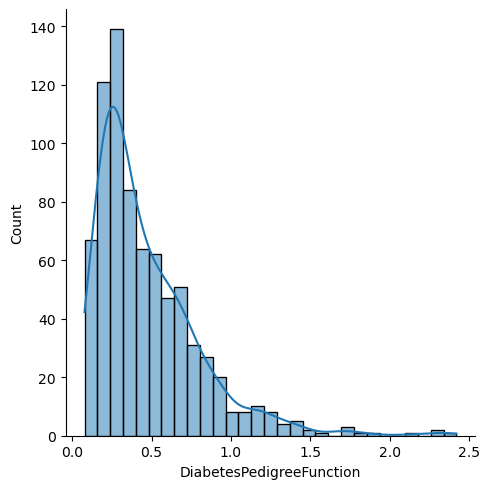

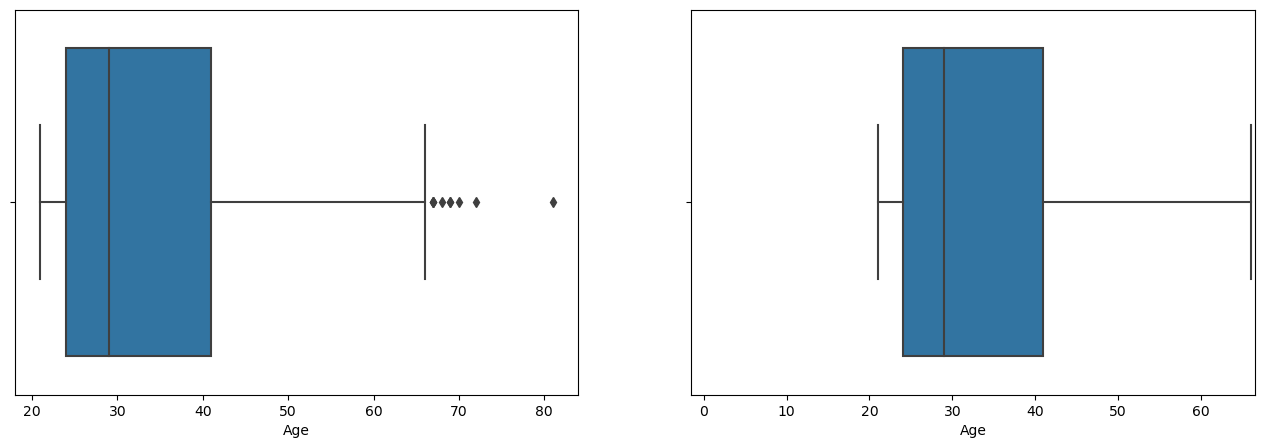

<Figure size 2000x500 with 0 Axes>

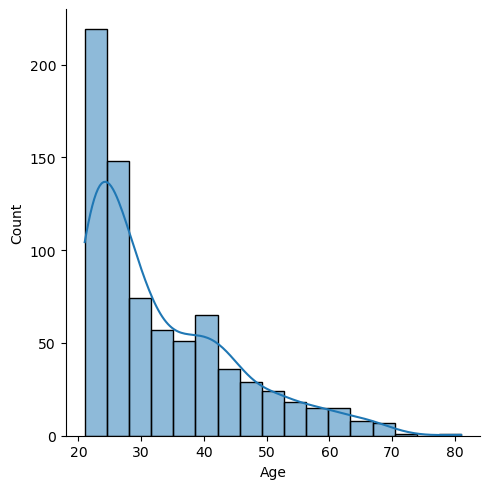

In [25]:
for i in df.drop('Outcome',axis=1).columns:
    diagrama_caixa(X[i])
    histograma(X[i])

### Observações

Analisando os gráficos para as variáveis acima, notei que algumas variáveis estão com alguns pacientes com valor 0 (zero), aparentando um dado não preenchido, as variáveis que apresentam valores 0 "anormais" são:
- "BMI" (indice de massa corporal) - O valor não pode ser 0 por ser um calculo a partir do peso e altura do paciente
- "BloodPressure" (Pressão sanguinea) - Não é possível um paciente vivo possuir uma pressão sanguinea de valor 0
- "Glucose" (Nível de glicose) - Abaixo de 70 mg/dl é considerado um paciente com hipoglicemia




Desta forma irei remover as linhas que possuem esses valores preenchidos com 0 para essas variáveis

In [16]:
df = df[~((df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['BMI'] == 0))]

Desta forma, excluimos 44 linhas da base de dados

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


### Verificando proporção da variável "Outcome"

- 500 pacientes sem diabetes
- 268 pacientes diagnosticados com diabetes

<Axes: xlabel='Outcome'>

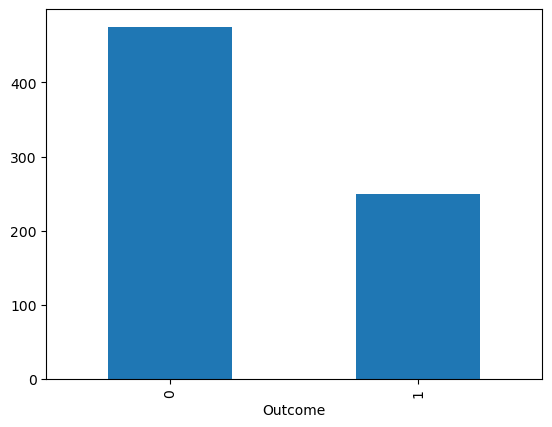

In [26]:
df['Outcome'].value_counts().plot.bar()

In [58]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Balanceando dados para equilibrar a variável resposta "Outcome"

Irei utilizar uma tecnica de balanceamento do tipo oversampling para que o dataset possua o mesmo valor de "0" e "1" para a variável "Outcome". A técnica escolhida será o SMOTE

In [29]:
X = df.drop("Outcome", axis=1)
y = df['Outcome']

In [30]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [31]:
y_res.value_counts()

Outcome
1    475
0    475
Name: count, dtype: int64

## Criação do modelo de Machine learning

Agora que realizei o tratamento dos dados e também o balanceamento irei começar a criação do modelo de machine learning, irei utilizar 2 modelos para comparação, RandomForestClassifier e DecisionTreeClassifier

### Separando a base em treino e teste

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Criando um modelo de RandomForestClassifier sem adicionar nenhum parâmetro

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Avaliando desempenho do modelo

In [36]:
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)

 Accuracy: 0.7736842105263158
 Precision: 0.7079646017699115
 Recall: 0.8888888888888888
 F1 Score: 0.7881773399014779


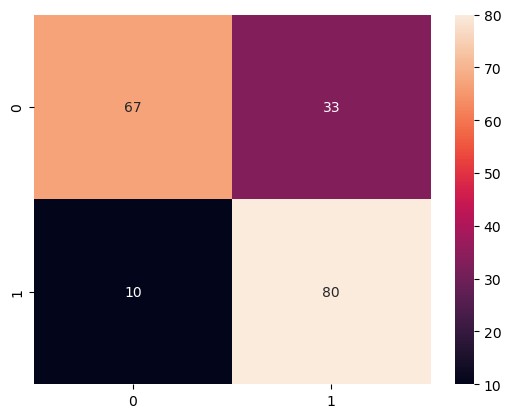

In [40]:
print(f' Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True)
plt.show()

## Criando um modelo de DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)

In [43]:
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)

 Accuracy: 0.7473684210526316
 Precision: 0.7058823529411765
 Recall: 0.8
 F1 Score: 0.75


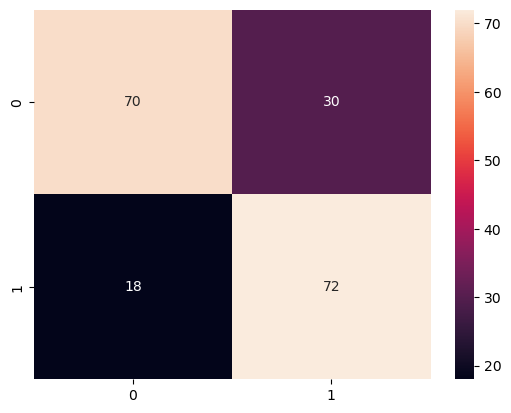

In [44]:
print(f' Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True)
plt.show()

### Comparando os dois modelos
Comparando os modelos sem a adicão de parâmetros, pude observar um melhor desempenho para o modelo de RandomForestClassifier, portanto irei utilizar como base o modelo de RandomForestClassifier adicionando parâmetros buscando um melhor desempenho

Irei utilizar o GridSearchCV para testar os parâmetros do modelo

In [45]:
parametros = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20,50],
    'criterion' :['gini', 'entropy']
}

In [46]:
CV_rf = GridSearchCV(estimator=rf, param_grid=parametros)
CV_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [47]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [48]:
rf1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=50, criterion='gini')

In [50]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=42)

In [51]:
y_pred = rf1.predict(X_test)

In [52]:
accuracy_rf1 = accuracy_score(y_test, y_pred)
precision_rf1 = precision_score(y_test, y_pred)
recall_rf1 = recall_score(y_test, y_pred)
f1_rf1 = f1_score(y_test, y_pred)
cm_rf1 = confusion_matrix(y_test, y_pred)

 Accuracy: 0.7842105263157895
 Precision: 0.7247706422018348
 Recall: 0.8777777777777778
 F1 Score: 0.7939698492462312


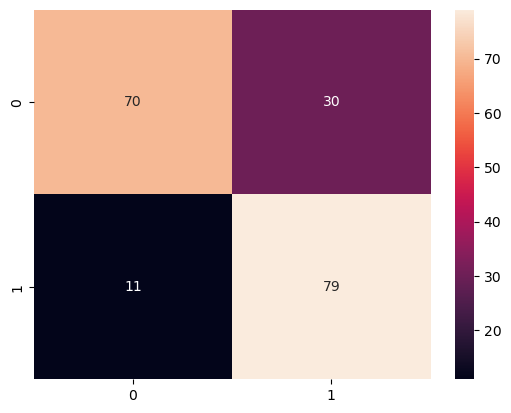

In [53]:
print(f' Accuracy: {accuracy_rf1}\n Precision: {precision_rf1}\n Recall: {recall_rf1}\n F1 Score: {f1_rf1}')
sns.heatmap(cm_rf1, annot=True)
plt.show()

## Conclusão

O modelo final escolhido foi o RandomForestClassifier com os seguintes parâmetros:
- max_depth = 50
- criterion = 'gini'
- n_estimators = 200
- max_features = 'sqrt'

A partir destes parâmetros foi possível chegar a uma acurácia de aproximadamente 78%.

Pelo fato do objetivo deste modelo ser um tipo de diagnostico prévio, acredito que a acurácia de 78% atenda as necessidades do projeto, o que não exclui a necessidade de acompanhamento médico para o diagnóstico final, apenas auxiliando na triagem para os médicos responsáveis.